In [106]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind

from pylab import rcParams
import seaborn as sb

import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency

import sklearn
from sklearn.preprocessing import scale
from collections import Counter
from matplotlib.pyplot import figure

In [118]:
%matplotlib inline
rcParams['figure.figsize'] = 20,16
sb.set_style('whitegrid')

In [111]:
address = '/Users/drewsheets/Desktop/l2c_results/Pilot_2/version.csv'
version = pd.read_csv(address)
version.columns = ['user', 'version', 'avg_error']

In [112]:
address2 = '/Users/drewsheets/Desktop/l2c_results/Pilot_2/estimates.csv'
estimates = pd.read_csv(address2)
estimates.columns = ['estimate_id', 'user_id', 'image_id',
                    'estimate_calories', 'perc_error', 'response_time',
                    'food_type', 'abs_value_error', 'version']

Text(1.1750000000000043, 0.5, '% Error (Absolute Value)')

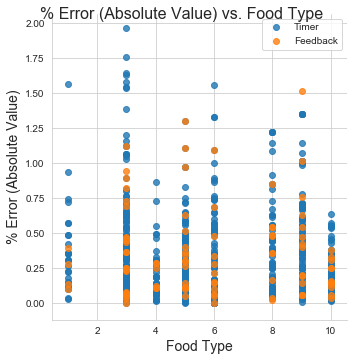

In [119]:
sb.lmplot(x='food_type', y='abs_value_error', data=estimates, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('% Error (Absolute Value) vs. Food Type', fontsize=16)
plt.xlabel('Food Type', fontsize=14)
plt.ylabel('% Error (Absolute Value)', fontsize=14)

Text(1.1750000000000043, 0.5, '% Error (Absolute Value)')

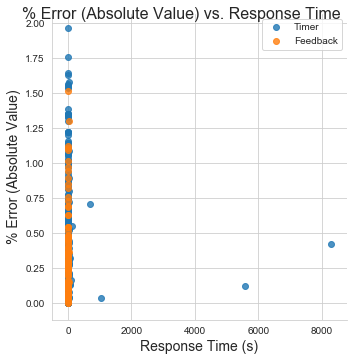

In [120]:
sb.lmplot(x='response_time', y='abs_value_error', data=estimates, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('% Error (Absolute Value) vs. Response Time', fontsize=16)
plt.xlabel('Response Time (s)', fontsize=14)
plt.ylabel('% Error (Absolute Value)', fontsize=14)

Text(-4.324999999999996, 0.5, '% Error (Average)')

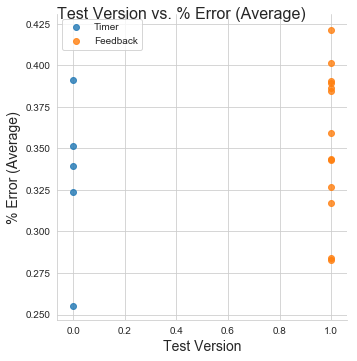

In [121]:
sb.lmplot(x='version', y='avg_error', data=version, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('Test Version vs. % Error (Average)', fontsize=16)
plt.xlabel('Test Version', fontsize=14)
plt.ylabel('% Error (Average)', fontsize=14)

Text(1.1750000000000043, 0.5, '% Error (Absolute Value)')

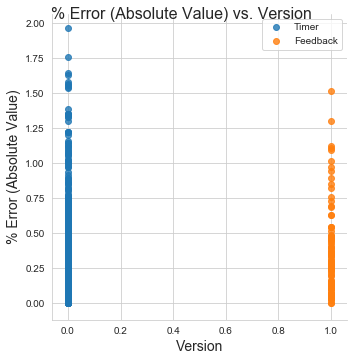

In [122]:
sb.lmplot(x='version', y='abs_value_error', data=estimates, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('% Error (Absolute Value) vs. Version', fontsize=16)
plt.xlabel('Version', fontsize=14)
plt.ylabel('% Error (Absolute Value)', fontsize=14)

Text(0.9250000000000043, 0.5, '% Error')

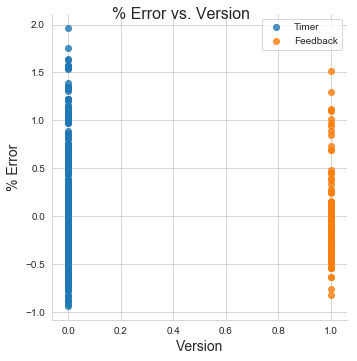

In [123]:
sb.lmplot(x='version', y='perc_error', data=estimates, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('% Error vs. Version', fontsize=16)
plt.xlabel('Version', fontsize=14)
plt.ylabel('% Error', fontsize=14)

Text(0.9250000000000043, 0.5, '% Error')

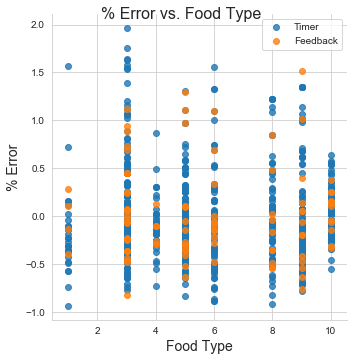

In [126]:
sb.lmplot(x='food_type', y='perc_error', data=estimates, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('% Error vs. Food Type', fontsize=16)
plt.xlabel('Food Type', fontsize=14)
plt.ylabel('% Error', fontsize=14)

Text(-1.4499999999999957, 0.5, 'Response Time (s)')

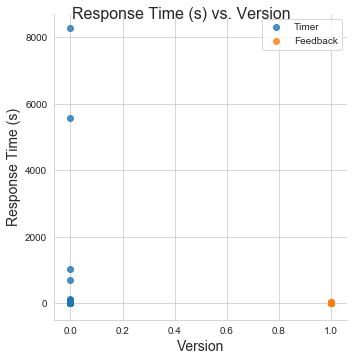

In [125]:
sb.lmplot(x='version', y='response_time', data=estimates, 
          fit_reg=False, hue='version', legend=False)
plt.legend(loc='best')
plt.legend(['Timer', 'Feedback'])
plt.suptitle('Response Time (s) vs. Version', fontsize=16)
plt.xlabel('Version', fontsize=14)
plt.ylabel('Response Time (s)', fontsize=14)

In [100]:
avg_error = version['avg_error']
version = version['version']

error = estimates['perc_error']
abs_error = estimates['abs_value_error']
time = estimates['response_time']
food_type = estimates['food_type']
quiz_type = estimates['version']

In [61]:
def pearson_corr(a, b):
    pearsonr_coefficient, p_value= pearsonr(a, b)
    corr = '%.4g'%(pearsonr_coefficient)
    p_val = '%.4g'%(p_value)
    print('Pearson Rank Correlation Coefficient: ' + str(corr) + '       ' + 'p_value: ' + str(p_val))

In [62]:
pearson_corr(avg_error, version)

Pearson Rank Correlation Coefficient: 0.2421       p_value: 0.3331


In [64]:
pearson_corr(quiz_type, abs_error)

Pearson Rank Correlation Coefficient: 0.001742       p_value: 0.9584


In [66]:
pearson_corr(food_type, abs_error)

Pearson Rank Correlation Coefficient: -0.0351       p_value: 0.2928


In [68]:
pearson_corr(time, abs_error)

Pearson Rank Correlation Coefficient: -0.008027       p_value: 0.81


In [69]:
def csquare_pval(a, b):
    table = pd.crosstab(a, b)
    chi2, p, dof, expected = chi2_contingency(table.values)
    chi_val = '%.4g'%(chi2)
    p_val = '%.4g'%(p)
    print ('Chi-square Statistic: ' + chi_val + '     p-value: ' + p_val)

In [85]:
csquare_pval(avg_error, version)

Chi-square Statistic: 18     p-value: 0.3888


In [86]:
csquare_pval(quiz_type, abs_error)

Chi-square Statistic: 412.4     p-value: 0.6599


In [87]:
csquare_pval(food_type, abs_error)

Chi-square Statistic: 4837     p-value: 8.148e-93


In [88]:
csquare_pval(time, abs_error)

Chi-square Statistic: 2.114e+04     p-value: 1.093e-141


In [71]:
def ttest(a, b):
    ttest = ttest_ind(a, b)
    t_val = '%.4g'%(ttest[0])
    p_val = '%.4g'%(ttest[1])
    dof = '%.4g'%(ttest[2])
    print('T-value: ' + str(t_val) + '     p-value: ' + str(p_val) + '     Degrees of Freedom: ' + str(dof))

In [81]:
ttest(avg_error, version)

T-value: -3.415     p-value: 0.001669     Degrees of Freedom: 34


In [82]:
ttest(quiz_type, abs_error)

T-value: -16.41     p-value: 1.628e-56     Degrees of Freedom: 1798


In [83]:
ttest(food_type, abs_error)

T-value: 60.57     p-value: 0     Degrees of Freedom: 1798


In [84]:
ttest(time, abs_error)

T-value: 2.34     p-value: 0.01941     Degrees of Freedom: 1798


In [73]:
def anova_results(a):
    f_stat = '%.4g'%(a[0])
    p_val = '%.4g'%(a[1])
    print('F-statistic: ' + str(f_stat) + '     p-value: ' + str(p_val))

In [77]:
anova = stats.f_oneway(avg_error, version)
anova_results(anova)

F-statistic: 11.66     p-value: 0.001669


In [78]:
anova = stats.f_oneway(quiz_type, abs_error)
anova_results(anova)

F-statistic: 269.4     p-value: 1.628e-56


In [79]:
anova = stats.f_oneway(food_type, abs_error)
anova_results(anova)

F-statistic: 3669     p-value: 0


In [80]:
anova = stats.f_oneway(time, abs_error)
anova_results(anova)

F-statistic: 5.474     p-value: 0.01941


In [89]:
anova = stats.f_oneway(quiz_type, food_type, time, abs_error)
anova_results(anova)

F-statistic: 4.989     p-value: 0.00187
